In [85]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [4]:
url = "Loan_Delinquent_Dataset.csv"
df = pd.read_csv(url)

#creditData = pd.read_csv("credit.csv")
df.head(10) #several missing values!

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500
5,6,1,36 months,Male,Car,Own,>25,>500
6,7,0,36 months,Female,House,Rent,>25,>500
7,8,0,36 months,Male,House,Mortgage,>25,>500
8,9,1,36 months,Male,House,Rent,>25,>500
9,10,1,36 months,Female,House,Rent,20-25,>500


In [5]:
df1 = df.copy()
df1.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [6]:
df1.shape

(11548, 8)

In [7]:
df1['isDelinquent'].value_counts()

1    7721
0    3827
Name: isDelinquent, dtype: int64

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11548.0,5774.500000,3333.764789,1.0,2887.75,5774.5,8661.25,11548.0
isDelinquent,11548.0,0.668601,0.470737,0.0,0.00,1.0,1.00,1.0


In [17]:
df2 = df1.drop(['ID'], axis=1)
df2

,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500
2,1,36 months,Female,House,Rent,>25,300-500
3,1,36 months,Female,Car,Mortgage,>25,300-500
4,1,36 months,Female,House,Rent,>25,300-500
...,...,...,...,...,...,...,...
11543,0,60 months,Male,other,Mortgage,>25,300-500
11544,1,36 months,Male,House,Rent,20-25,300-500
11545,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,1,36 months,Female,House,Rent,20-25,300-500


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   isDelinquent    11548 non-null  int64   
 1   term            11548 non-null  category
 2   gender          11548 non-null  category
 3   purpose         11548 non-null  category
 4   home_ownership  11548 non-null  category
 5   age             11548 non-null  category
 6   FICO            11548 non-null  category
dtypes: category(6), int64(1)
memory usage: 159.0 KB


In [19]:
for feature in df2.columns: # Loop through all columns in the dataframe
    if df2[feature].dtype == 'object': # Only apply for columns with categorical strings
        df2[feature] = pd.Categorical(df2[feature])# Replace strings with an integer
df2.head(10)

,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500
2,1,36 months,Female,House,Rent,>25,300-500
3,1,36 months,Female,Car,Mortgage,>25,300-500
4,1,36 months,Female,House,Rent,>25,300-500
5,1,36 months,Male,Car,Own,>25,>500
6,0,36 months,Female,House,Rent,>25,>500
7,0,36 months,Male,House,Mortgage,>25,>500
8,1,36 months,Male,House,Rent,>25,>500
9,1,36 months,Female,House,Rent,20-25,>500


In [22]:
df2_term = df2["term"].str.split(" ", expand=True)
df2_term.head()

,0,1
0,36,months
1,36,months
2,36,months
3,36,months
4,36,months


In [23]:
# let's verify that there is only one unit
df2_term[1].value_counts()

months    11548
Name: 1, dtype: int64

In [25]:
# we will create a new column for engine values
df2["term"] = df2_term[0].astype(int)

# Checking the new dataframe
df2.head()

,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36,Female,House,Mortgage,>25,300-500
1,0,36,Female,House,Rent,20-25,>500
2,1,36,Female,House,Rent,>25,300-500
3,1,36,Female,Car,Mortgage,>25,300-500
4,1,36,Female,House,Rent,>25,300-500


In [26]:
print(df2.term.value_counts())
print(df2.gender.value_counts())
print(df2.purpose.value_counts())
print(df2.home_ownership.value_counts())
print(df2.age.value_counts())
print(df2.FICO.value_counts())
print(df2.isDelinquent.value_counts())



36    10589
60      959
Name: term, dtype: int64
Male      6555
Female    4993
Name: gender, dtype: int64
House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: purpose, dtype: int64
Mortgage    5461
Rent        5216
Own          871
Name: home_ownership, dtype: int64
20-25    5888
>25      5660
Name: age, dtype: int64
300-500    6370
>500       5178
Name: FICO, dtype: int64
1    7721
0    3827
Name: isDelinquent, dtype: int64


In [29]:
replaceStruct = {
                "age":     {">25": 1, "20-25": 2 },
                "FICO": {"300-500": 1, ">500":2}  
                }
oneHotCols=["purpose","gender","home_ownership"]


In [30]:
df2=df2.replace(replaceStruct)
df2=pd.get_dummies(df2, columns=oneHotCols)
df2.head(10)

,isDelinquent,term,age,FICO,purpose_Car,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,purpose_other,gender_Female,gender_Male,home_ownership_Mortgage,home_ownership_Own,home_ownership_Rent
0,1,36,1,1,0,1,0,0,0,0,0,1,0,1,0,0
1,0,36,2,2,0,1,0,0,0,0,0,1,0,0,0,1
2,1,36,1,1,0,1,0,0,0,0,0,1,0,0,0,1
3,1,36,1,1,1,0,0,0,0,0,0,1,0,1,0,0
4,1,36,1,1,0,1,0,0,0,0,0,1,0,0,0,1
5,1,36,1,2,1,0,0,0,0,0,0,0,1,0,1,0
6,0,36,1,2,0,1,0,0,0,0,0,1,0,0,0,1
7,0,36,1,2,0,1,0,0,0,0,0,0,1,1,0,0
8,1,36,1,2,0,1,0,0,0,0,0,0,1,0,0,1
9,1,36,2,2,0,1,0,0,0,0,0,1,0,0,0,1


In [31]:
df2.shape

(11548, 16)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   isDelinquent             11548 non-null  int64
 1   term                     11548 non-null  int64
 2   age                      11548 non-null  int64
 3   FICO                     11548 non-null  int64
 4   purpose_Car              11548 non-null  uint8
 5   purpose_House            11548 non-null  uint8
 6   purpose_Medical          11548 non-null  uint8
 7   purpose_Other            11548 non-null  uint8
 8   purpose_Personal         11548 non-null  uint8
 9   purpose_Wedding          11548 non-null  uint8
 10  purpose_other            11548 non-null  uint8
 11  gender_Female            11548 non-null  uint8
 12  gender_Male              11548 non-null  uint8
 13  home_ownership_Mortgage  11548 non-null  uint8
 14  home_ownership_Own       11548 non-null  uint8
 15  ho

In [33]:
X = df2.drop("isDelinquent" , axis=1)
y = df2.pop("isDelinquent")

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [35]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [36]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.8522825683533342
Accuracy on test set :  0.847041847041847


In [37]:
#Checking number of positives
y.sum(axis = 0)

7721

In [38]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

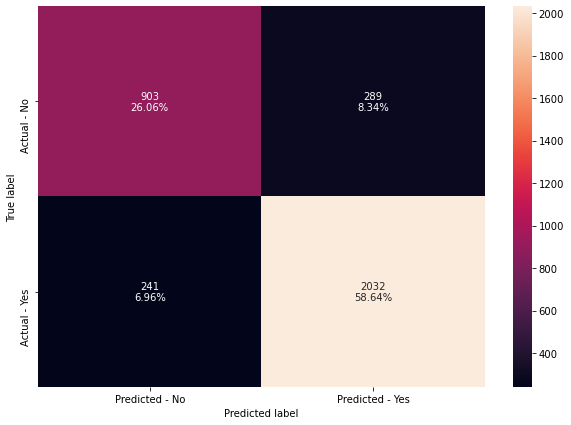

In [40]:
make_confusion_matrix(dTree,y_test)

In [41]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9065712187958884
Recall on test set :  0.8939727232732072


In [42]:
feature_names = list(X.columns)
print(feature_names)

['term', 'age', 'FICO', 'purpose_Car', 'purpose_House', 'purpose_Medical', 'purpose_Other', 'purpose_Personal', 'purpose_Wedding', 'purpose_other', 'gender_Female', 'gender_Male', 'home_ownership_Mortgage', 'home_ownership_Own', 'home_ownership_Rent']


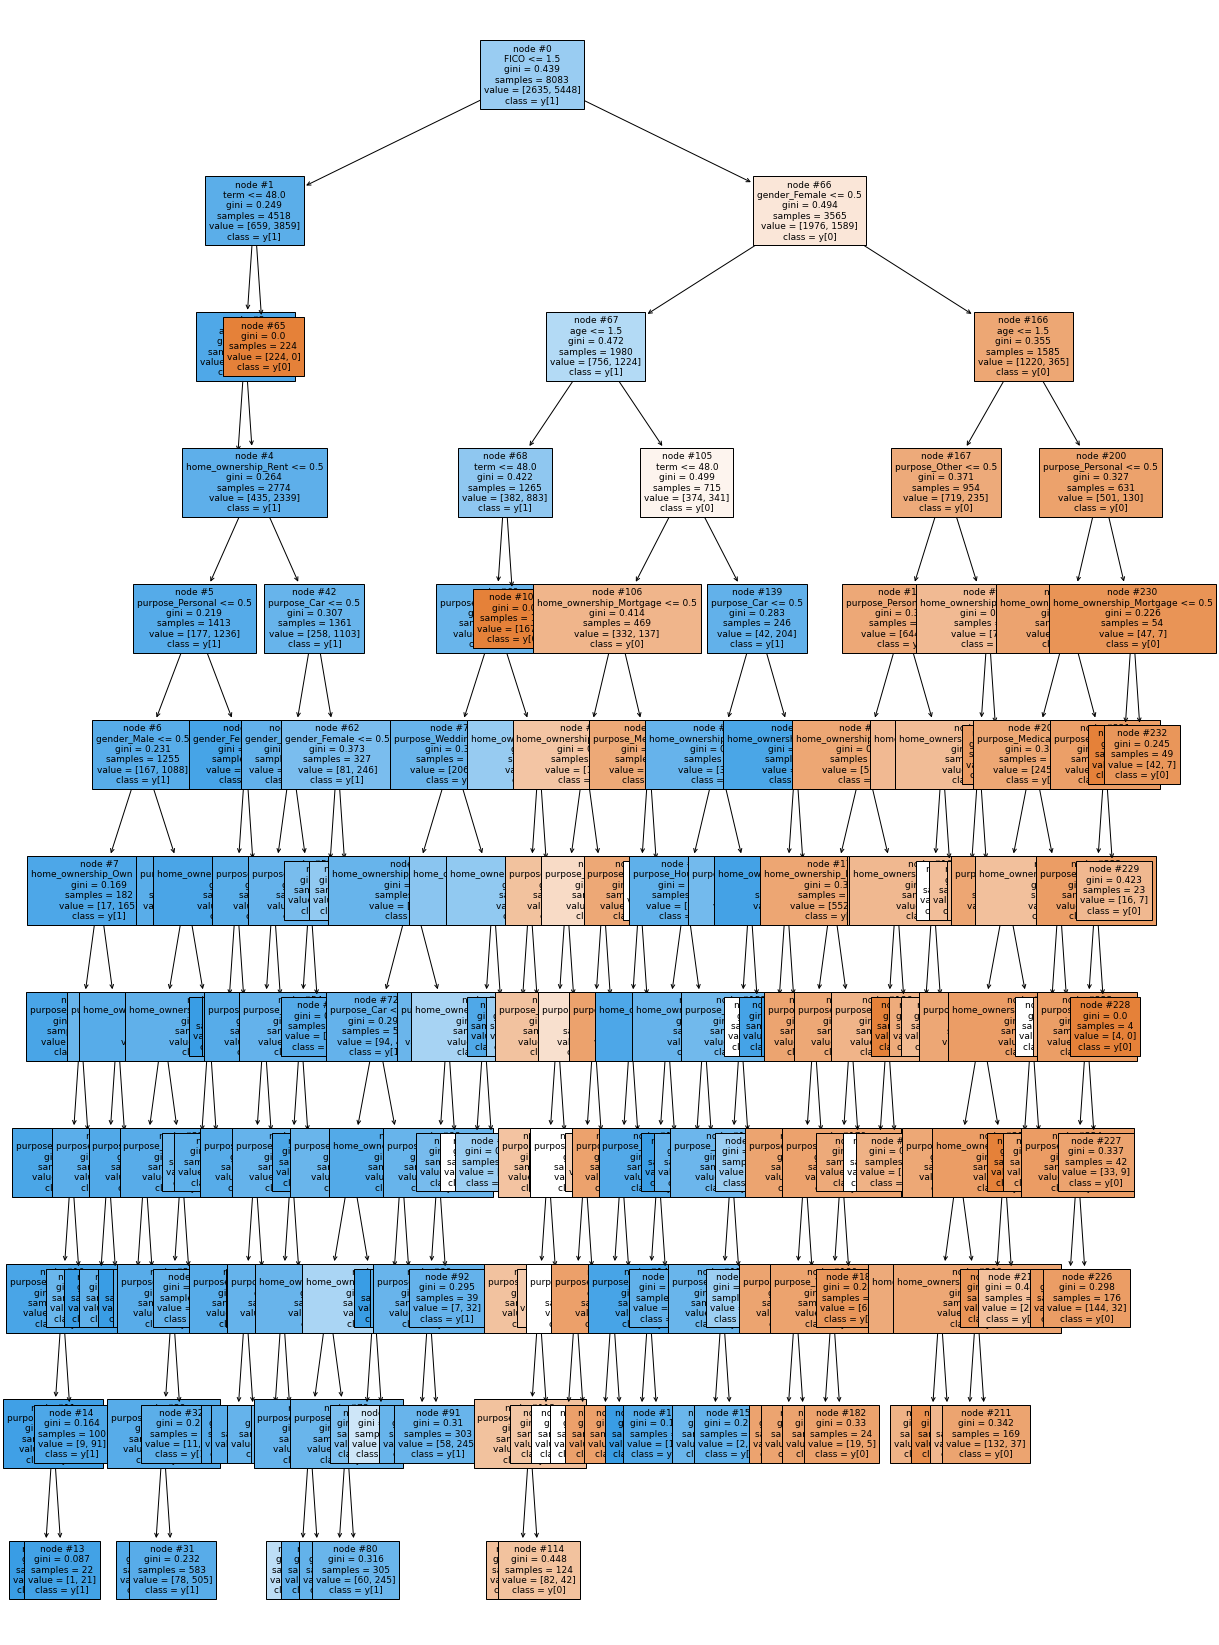

In [43]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [44]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- FICO <= 1.50
|   |--- term <= 48.00
|   |   |--- age <= 1.50
|   |   |   |--- weights: [0.00, 1520.00] class: 1
|   |   |--- age >  1.50
|   |   |   |--- home_ownership_Rent <= 0.50
|   |   |   |   |--- purpose_Personal <= 0.50
|   |   |   |   |   |--- gender_Male <= 0.50
|   |   |   |   |   |   |--- home_ownership_Own <= 0.50
|   |   |   |   |   |   |   |--- purpose_Other <= 0.50
|   |   |   |   |   |   |   |   |--- purpose_Medical <= 0.50
|   |   |   |   |   |   |   |   |   |--- purpose_House <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- purpose_Car <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- purpose_Car >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 21.00] class: 1
|   |   |   |   |   |   |   |   |   |--- purpose_House >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [9.00, 91.00] class: 1
|   |   |   |   |   |   |   |   |--- purpose_Medical >  

In [45]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
FICO                     0.393915
term                     0.370052
gender_Female            0.157279
age                      0.055813
home_ownership_Rent      0.004530
purpose_Car              0.004071
home_ownership_Mortgage  0.003365
purpose_Personal         0.002930
purpose_House            0.001778
home_ownership_Own       0.001698
purpose_Medical          0.001542
purpose_Other            0.001237
purpose_Wedding          0.001145
gender_Male              0.000632
purpose_other            0.000013


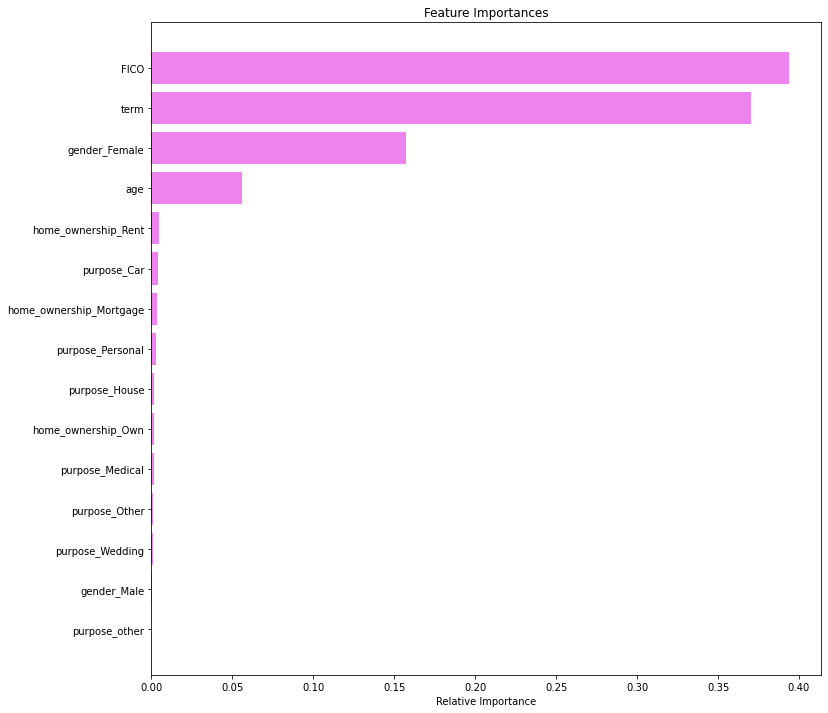

In [46]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [47]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

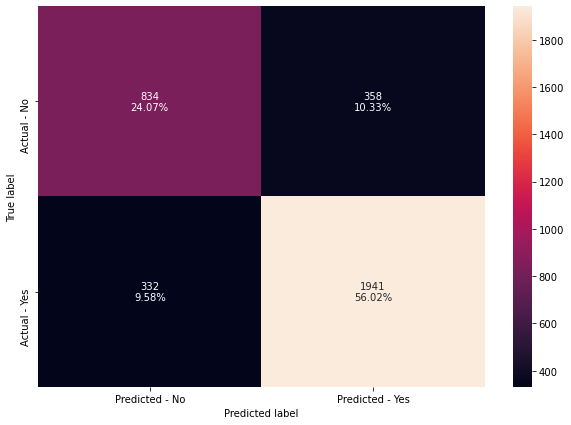

In [48]:
make_confusion_matrix(dTree1, y_test)

In [49]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.8115798589632562
Accuracy on test set :  0.8008658008658008
Recall on training set :  0.8704111600587372
Recall on test set :  0.8539375274967004


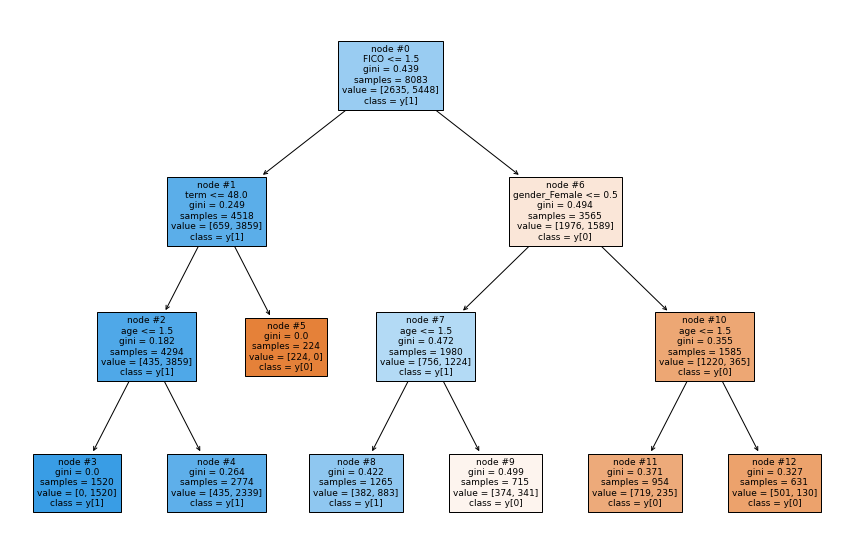

In [50]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [51]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- FICO <= 1.50
|   |--- term <= 48.00
|   |   |--- age <= 1.50
|   |   |   |--- weights: [0.00, 1520.00] class: 1
|   |   |--- age >  1.50
|   |   |   |--- weights: [435.00, 2339.00] class: 1
|   |--- term >  48.00
|   |   |--- weights: [224.00, 0.00] class: 0
|--- FICO >  1.50
|   |--- gender_Female <= 0.50
|   |   |--- age <= 1.50
|   |   |   |--- weights: [382.00, 883.00] class: 1
|   |   |--- age >  1.50
|   |   |   |--- weights: [374.00, 341.00] class: 0
|   |--- gender_Female >  0.50
|   |   |--- age <= 1.50
|   |   |   |--- weights: [719.00, 235.00] class: 0
|   |   |--- age >  1.50
|   |   |   |--- weights: [501.00, 130.00] class: 0



In [52]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
FICO                     0.486027
term                     0.251426
gender_Female            0.193683
age                      0.068864
purpose_Car              0.000000
purpose_House            0.000000
purpose_Medical          0.000000
purpose_Other            0.000000
purpose_Personal         0.000000
purpose_Wedding          0.000000
purpose_other            0.000000
gender_Male              0.000000
home_ownership_Mortgage  0.000000
home_ownership_Own       0.000000
home_ownership_Rent      0.000000


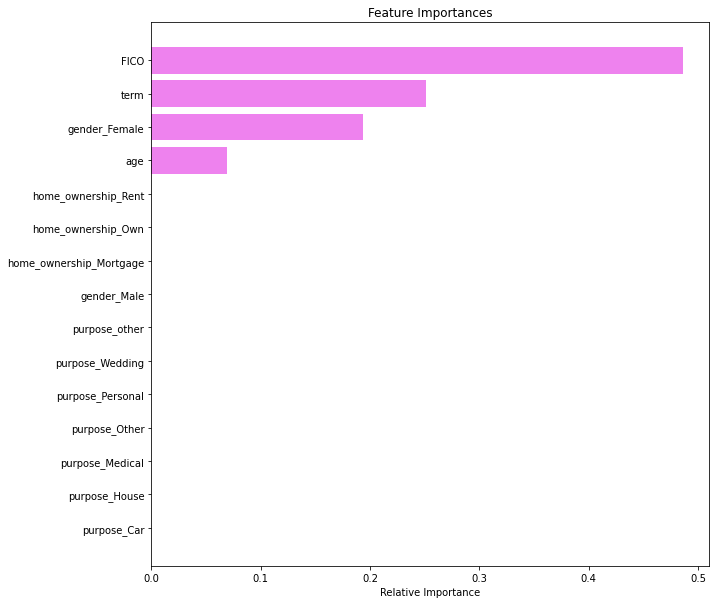

In [53]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": np.arange(2, 50, 5),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2,
                       min_impurity_decrease=1e-06, random_state=1)

<IPython.core.display.Javascript object>

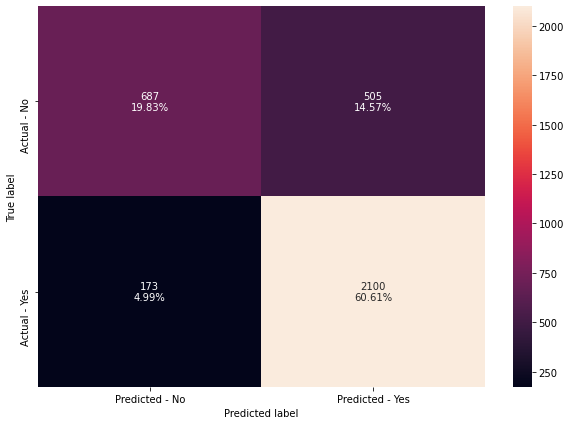

<IPython.core.display.Javascript object>

In [88]:
make_confusion_matrix(estimator, y_test)

In [89]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(X_train, y_train))
print("Accuracy on test set : ", estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.8074972163800569
Accuracy on test set :  0.8043290043290043
Recall on training set :  0.9330029368575624
Recall on test set :  0.9238891333040036


<IPython.core.display.Javascript object>

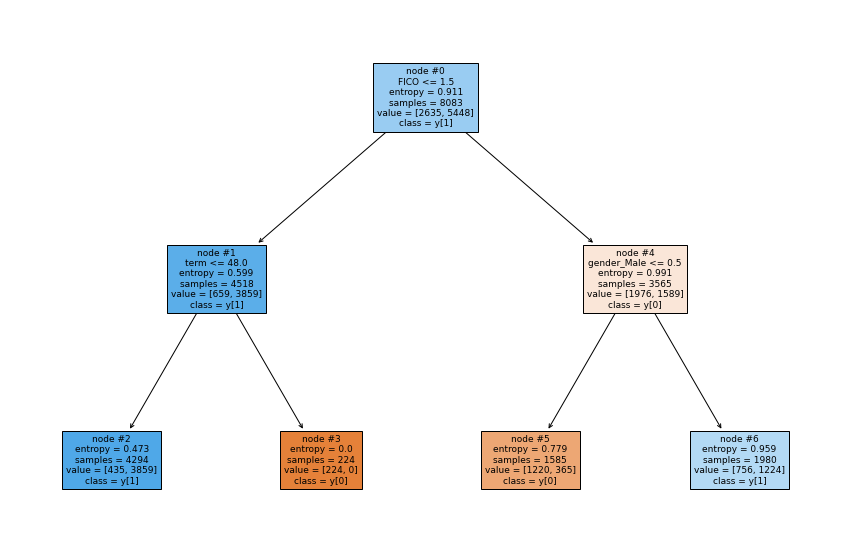

<IPython.core.display.Javascript object>

In [90]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [91]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                              Imp
FICO                     0.509436
term                     0.307916
gender_Male              0.182648
age                      0.000000
purpose_Car              0.000000
purpose_House            0.000000
purpose_Medical          0.000000
purpose_Other            0.000000
purpose_Personal         0.000000
purpose_Wedding          0.000000
purpose_other            0.000000
gender_Female            0.000000
home_ownership_Mortgage  0.000000
home_ownership_Own       0.000000
home_ownership_Rent      0.000000


<IPython.core.display.Javascript object>

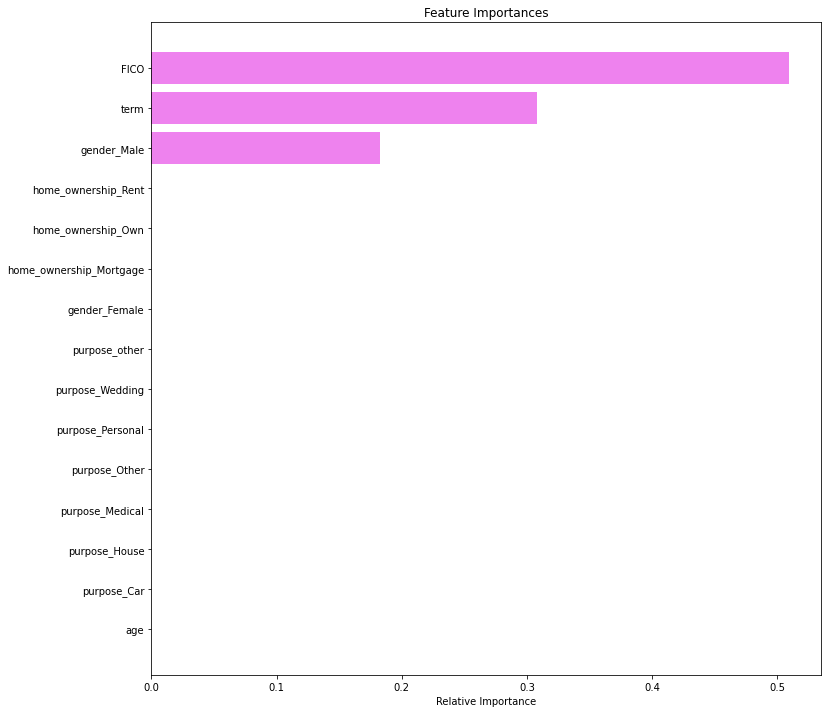

<IPython.core.display.Javascript object>

In [92]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [93]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [94]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.230660
1,0.000000e+00,0.230660
2,0.000000e+00,0.230660
3,1.661655e-08,0.230660
4,2.094936e-08,0.230660
5,7.258659e-08,0.230660
6,7.930541e-08,0.230660
7,1.262711e-07,0.230660
8,2.975970e-07,0.230661
9,3.564890e-07,0.230661


<IPython.core.display.Javascript object>

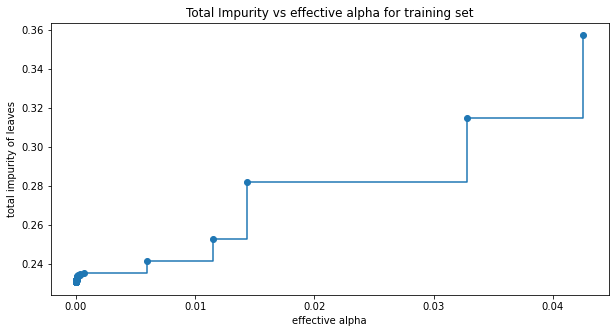

<IPython.core.display.Javascript object>

In [95]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [96]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08224274200133641


<IPython.core.display.Javascript object>

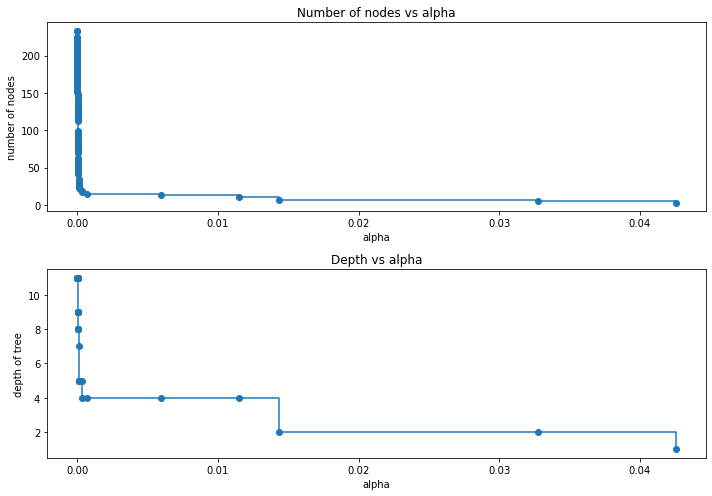

<IPython.core.display.Javascript object>

In [97]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [98]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

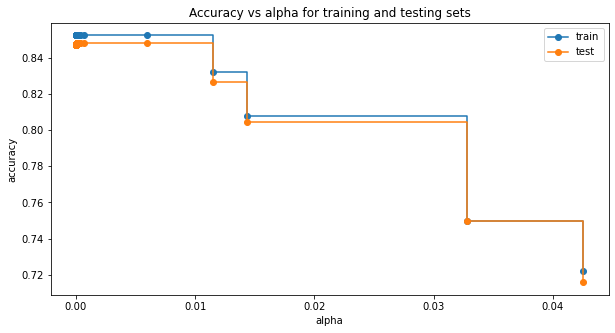

<IPython.core.display.Javascript object>

In [99]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [100]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(X_train, y_train))
print("Test accuracy of best model: ", best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=5.765036111757965e-05, random_state=1)
Training accuracy of best model:  0.8522825683533342
Test accuracy of best model:  0.8479076479076479


<IPython.core.display.Javascript object>

In [101]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [102]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

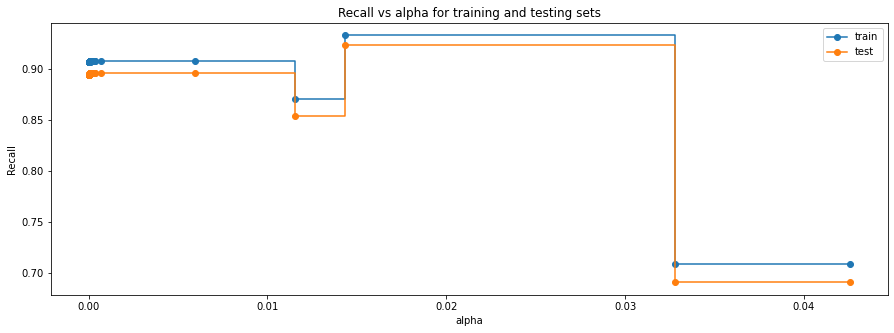

<IPython.core.display.Javascript object>

In [103]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [104]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.014360447257054786, random_state=1)


<IPython.core.display.Javascript object>

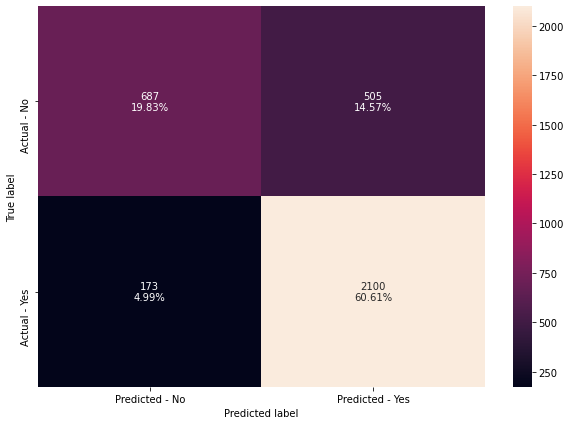

<IPython.core.display.Javascript object>

In [105]:
make_confusion_matrix(best_model, y_test)

In [106]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9330029368575624
Recall on test set :  0.9238891333040036


<IPython.core.display.Javascript object>

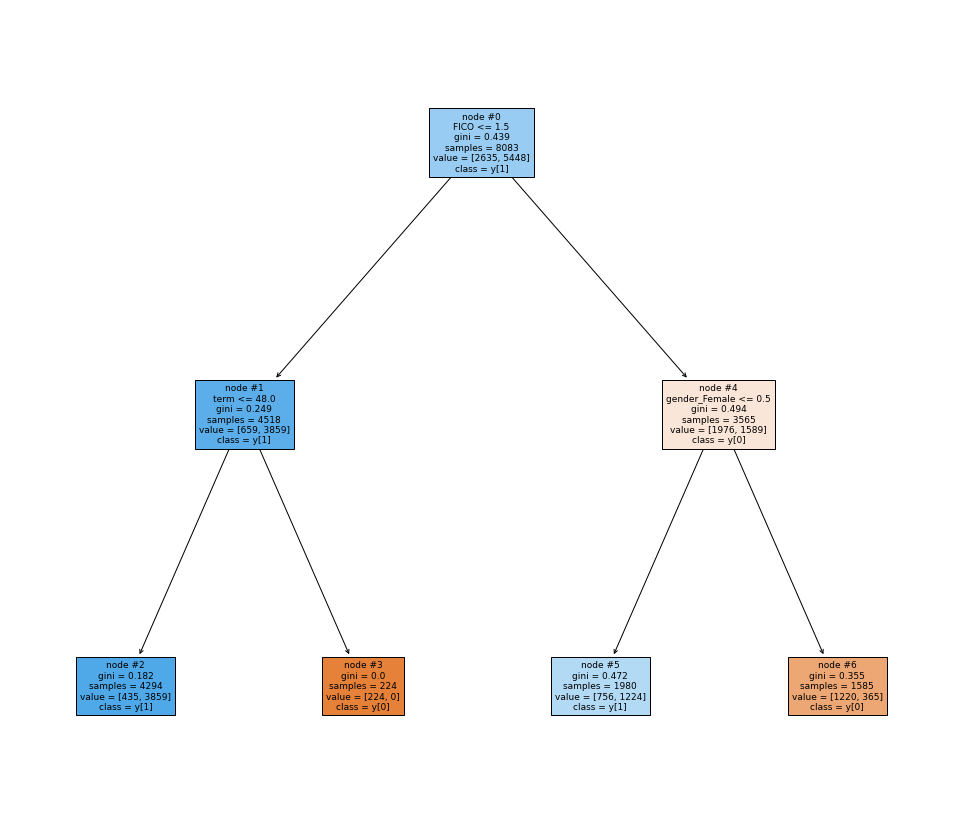

<IPython.core.display.Javascript object>

In [107]:
plt.figure(figsize=(17, 15))

tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [108]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- FICO <= 1.50
|   |--- term <= 48.00
|   |   |--- weights: [435.00, 3859.00] class: 1
|   |--- term >  48.00
|   |   |--- weights: [224.00, 0.00] class: 0
|--- FICO >  1.50
|   |--- gender_Female <= 0.50
|   |   |--- weights: [756.00, 1224.00] class: 1
|   |--- gender_Female >  0.50
|   |   |--- weights: [1220.00, 365.00] class: 0



<IPython.core.display.Javascript object>

In [109]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- FICO <= 1.50
|   |--- term <= 48.00
|   |   |--- weights: [435.00, 3859.00] class: 1
|   |--- term >  48.00
|   |   |--- weights: [224.00, 0.00] class: 0
|--- FICO >  1.50
|   |--- gender_Female <= 0.50
|   |   |--- weights: [756.00, 1224.00] class: 1
|   |--- gender_Female >  0.50
|   |   |--- weights: [1220.00, 365.00] class: 0



<IPython.core.display.Javascript object>

In [110]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
FICO                     0.521973
term                     0.270021
gender_Female            0.208007
age                      0.000000
purpose_Car              0.000000
purpose_House            0.000000
purpose_Medical          0.000000
purpose_Other            0.000000
purpose_Personal         0.000000
purpose_Wedding          0.000000
purpose_other            0.000000
gender_Male              0.000000
home_ownership_Mortgage  0.000000
home_ownership_Own       0.000000
home_ownership_Rent      0.000000


<IPython.core.display.Javascript object>

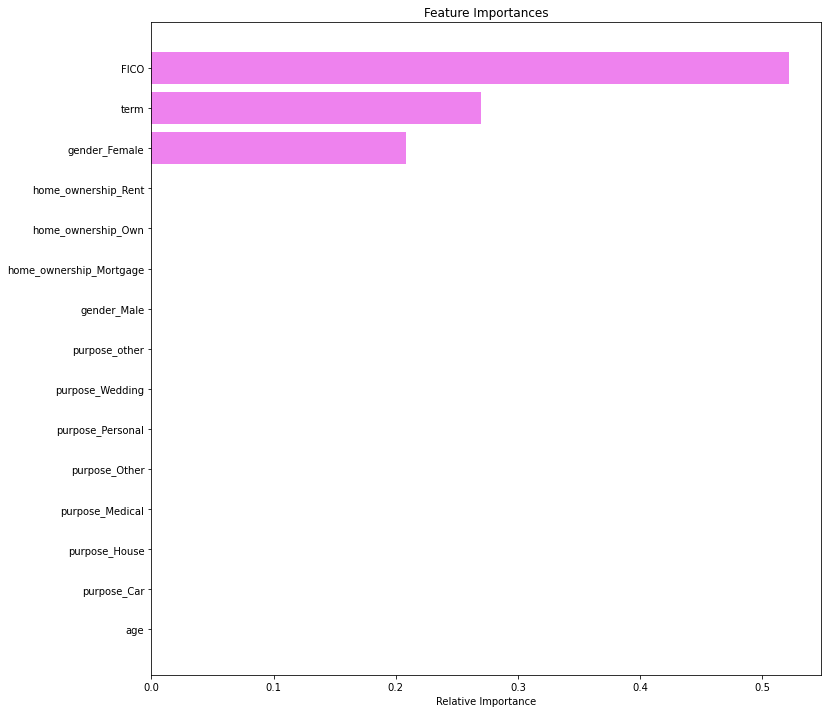

<IPython.core.display.Javascript object>

In [111]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [112]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with restricted maximum depth",
            "Decision treee with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [1, 0.53, 0.56, 0.63],
        "Test_Recall": [0.46, 0.46, 0.52, 0.56],
    }
)
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.46
1,Decision tree with restricted maximum depth,0.53,0.46
2,Decision treee with hyperparameter tuning,0.56,0.52
3,Decision tree with post-pruning,0.63,0.56


<IPython.core.display.Javascript object>